In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [10, 5]

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "/Users/admin/Documents/Data_Analytics_Class/matplotlib-challenge/data_matplotlib/mouse_drug_data.csv"
clinical_trial_data_to_load = "/Users/admin/Documents/Data_Analytics_Class/matplotlib-challenge/data_matplotlib/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymac_merge = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")
pymac_merge.head()

# Display the data table for preview



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
pymac_merge_small = pymac_merge[["Drug", "Timepoint", """Tumor Volume (mm3)"""]]
pymac_grouped = pymac_merge_small.groupby(["Drug", "Timepoint"])
pymac_mean = pymac_grouped.mean()

pymac_tumorvolume = pd.DataFrame(pymac_mean)
pymac_tumorvolume_df = pymac_tumorvolume.reset_index()
#pymac_drug_df = pymac_tumorvolume_df.set_index("Drug")
pymac_pivot = pymac_tumorvolume_df.pivot(index="Timepoint", columns="Drug", values="""Tumor Volume (mm3)""")
pymac_scatter1 = pymac_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
pymac_scatter1


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [16]:
#creating the error bar data with .sem
pymac_errors = pymac_grouped.sem()
pymac_errors2 = pd.DataFrame(pymac_errors)
pymac_errors_df = pymac_errors2.reset_index()
pymac_errors_pivot = pymac_errors_df.pivot(index="Timepoint", columns="Drug", values="""Tumor Volume (mm3)""")
errors_scatter1 = pymac_errors_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
errors_scatter1

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


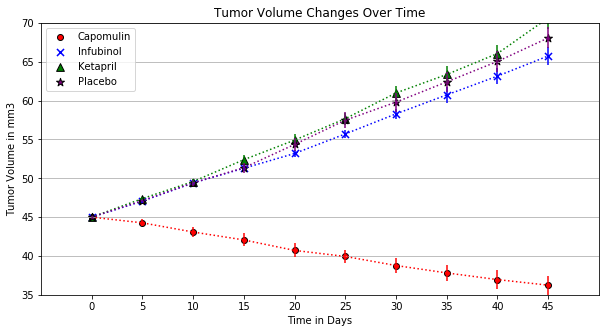

In [17]:
#creating separate scatter plots to be combined
x_axis = np.arange(0,50,5)
set1_data = pymac_scatter1["Capomulin"]
plt.scatter(x_axis, set1_data, marker="o", facecolors="red", edgecolors="black", 
            label="Capomulin")

set2_data = pymac_scatter1["Infubinol"]
plt.scatter(x_axis, set2_data, marker="x", s=50, facecolors="blue", edgecolors="black", 
           label="Infubinol")

set3_data = pymac_scatter1["Ketapril"]
plt.scatter(x_axis, set3_data, marker="^", s=60, facecolors="green", edgecolors="black",
                      label="Ketapril")

set4_data = pymac_scatter1["Placebo"]
plt.scatter(x_axis, set4_data, marker="*", s=70, facecolors="purple", edgecolors="black",
                     label="Placebo")

#setting up error bars
error_bar1 = errors_scatter1["Capomulin"]
error_bar2 = errors_scatter1["Infubinol"]
error_bar3 = errors_scatter1["Ketapril"]
error_bar4 = errors_scatter1["Placebo"]

#pairing error bars with scatter plot data
plt.errorbar(x_axis, set1_data, yerr=error_bar1, fmt=":", color="red")
plt.errorbar(x_axis, set2_data, yerr=error_bar2, fmt=":", color="blue")
plt.errorbar(x_axis, set3_data, yerr=error_bar3, fmt=":", color="green")
plt.errorbar(x_axis, set4_data, yerr=error_bar4, fmt=":", color="purple")

xticks = [value for value in x_axis]
plt.ylim(35,70)
plt.xlim(-5,50)
plt.title("Tumor Volume Changes Over Time")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume in mm3")
plt.xticks(xticks)
plt.gca().yaxis.grid(True)
plt.legend(loc="upper left")
plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [18]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_merge = pymac_merge[["Drug", "Timepoint", "Metastatic Sites"]]
meta_grouped = meta_merge.groupby(["Drug", "Timepoint"])
meta_mean = meta_grouped.mean()

meta_tumorvolume = pd.DataFrame(meta_mean)
meta_tumorvolume_df = meta_tumorvolume.reset_index()

meta_pivot = meta_tumorvolume_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
meta_scatter1 = meta_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
meta_scatter1


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [19]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#creating the error bar data with .sem
meta_errors = meta_grouped.sem()
meta_errors2 = pd.DataFrame(meta_errors)
meta_errors_df = meta_errors2.reset_index()
meta_errors_pivot = meta_errors_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
meta_errors_chart = meta_errors_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
meta_errors_chart


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


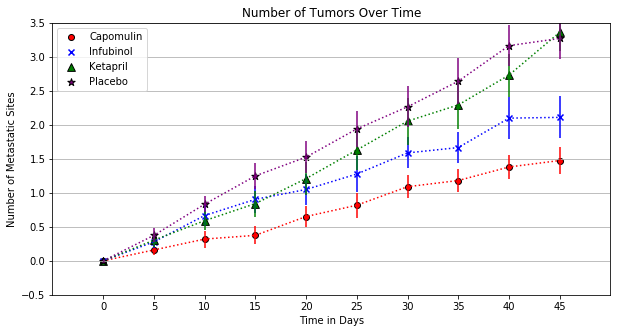

In [20]:
#creating separate scatter plots to be combined
x_ax = np.arange(0,50,5)
data1 = meta_scatter1["Capomulin"]
plt.scatter(x_ax, data1, marker="o", facecolors="red", edgecolors="black", 
            label="Capomulin")

data2 = meta_scatter1["Infubinol"]
plt.scatter(x_ax, data2, marker="x", facecolors="blue", edgecolors="black", 
           label="Infubinol")

data3 = meta_scatter1["Ketapril"]
plt.scatter(x_ax, data3, marker="^", s=60, facecolors="green", edgecolors="black",
                      label="Ketapril")

data4 = meta_scatter1["Placebo"]
plt.scatter(x_ax, data4, marker="*", s=60, facecolors="purple", edgecolors="black",
                     label="Placebo")

#setting up error bars
meta_error_bar1 = meta_errors_chart["Capomulin"]
meta_error_bar2 = meta_errors_chart["Infubinol"]
meta_error_bar3 = meta_errors_chart["Ketapril"]
meta_error_bar4 = meta_errors_chart["Placebo"]

#pairing error bars with scatter plot data
plt.errorbar(x_ax, data1, yerr=meta_error_bar1, fmt=":", color="red")
plt.errorbar(x_ax, data2, yerr=meta_error_bar2, fmt=":", color="blue")
plt.errorbar(x_ax, data3, yerr=meta_error_bar3, fmt=":", color="green")
plt.errorbar(x_ax, data4, yerr=meta_error_bar4, fmt=":", color="purple")

xticks = [value for value in x_axis]
plt.ylim(-0.5,3.5)
plt.xlim(-5,50)
plt.title("Number of Tumors Over Time")
plt.xlabel("Time in Days")
plt.ylabel("Number of Metastatic Sites")
plt.xticks(xticks)
plt.gca().yaxis.grid(True)
plt.legend(loc="upper left")
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
 
mouse_merge = pymac_merge[["Drug", "Timepoint", "Mouse ID"]]
mouse_grouped = mouse_merge.groupby(["Drug", "Timepoint"])
mouse_count = mouse_grouped.count()

mouse_survival = pd.DataFrame(mouse_count)
mouse_survival_df = mouse_survival.reset_index()


mouse_pivot = mouse_survival_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
mouse_scatter1 = mouse_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mouse_scatter1["Capomulin"] = ((mouse_scatter1["Capomulin"])/(25))*100
mouse_scatter1["Infubinol"] = ((mouse_scatter1["Infubinol"])/(25))*100
mouse_scatter1["Ketapril"] = ((mouse_scatter1["Ketapril"])/(25))*100
mouse_scatter1["Placebo"] = ((mouse_scatter1["Placebo"])/(25))*100

mouse_scatter1


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


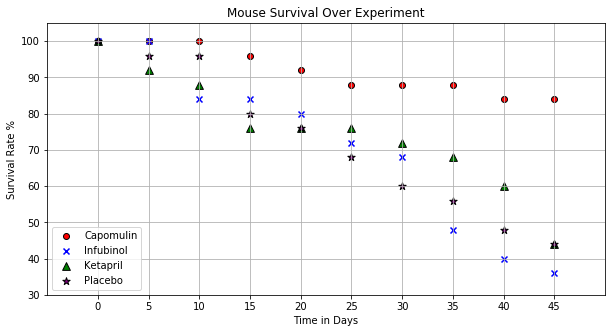

In [30]:
#creating separate scatter plots to be combined
x_ax = np.arange(0,50,5)
mouse_data1 = mouse_scatter1["Capomulin"]
plt.scatter(x_ax, mouse_data1, marker="o", facecolors="red", edgecolors="black", 
            label="Capomulin")

mouse_data2 = mouse_scatter1["Infubinol"]
plt.scatter(x_ax, mouse_data2, marker="x", facecolors="blue", edgecolors="black", 
           label="Infubinol")

mouse_data3 = mouse_scatter1["Ketapril"]
plt.scatter(x_ax, mouse_data3, marker="^", s=60, facecolors="green", edgecolors="black",
                      label="Ketapril")

mouse_data4 = mouse_scatter1["Placebo"]
plt.scatter(x_ax, mouse_data4, marker="*", s=60, facecolors="purple", edgecolors="black",
                     label="Placebo")


xticks = [value for value in x_axis]
plt.ylim(30,105)
plt.xlim(-5,50)
plt.title("Mouse Survival Over Experiment")
plt.xlabel("Time in Days")
plt.ylabel("Survival Rate %")
plt.xticks(xticks)
plt.grid()
plt.legend(loc="lower left")
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [61]:
summary_data = (pymac_scatter1.pct_change(periods=9))*100
summary_data_df = pd.DataFrame(summary_data.dropna().reset_index())
summary_data_df 


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,45,-19.475303,46.123472,57.028795,51.29796


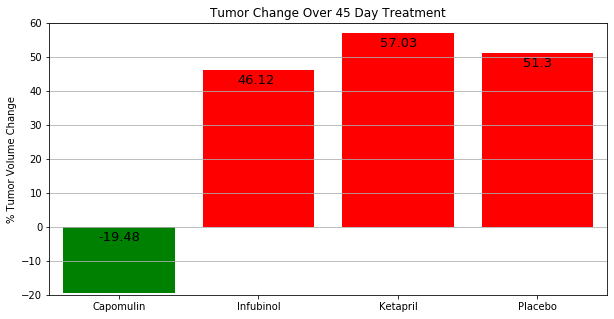

In [131]:
# Store all Relevant Percent Changes into a Tuple
y_axis = [summary_data_df["Capomulin"][0],summary_data_df["Infubinol"][0],summary_data_df["Ketapril"][0], summary_data_df["Placebo"][0]]
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color=("green","red","red","red"), align="center")
xtick_locations=[value for value in x_axis]
plt.xticks(xtick_locations,["Capomulin","Infubinol","Ketapril", "Placebo"])
plt.xlim(-0.50, len(x_axis)-0.50)
plt.ylim(-20,60)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.gca().yaxis.grid(True)
plt.text(-.15, -4, str(round(summary_data_df["Capomulin"][0],2)), fontsize=13)
plt.text(.85, 42, str(round(summary_data_df["Infubinol"][0],2)), fontsize=13)
plt.text(1.87, 53, str(round(summary_data_df["Ketapril"][0],2)), fontsize=13)
plt.text(2.9, 47, str(round(summary_data_df["Placebo"][0],2)), fontsize=13)
plt.savefig("/Users/admin/Documents/Data_Analytics_Class/matplotlib-challenge/bargraph.png")
plt.show()




![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#conclusions
#My first observation upon compiling this data is that from all of the above graphs I can 
#condlude that Capomulin was the most effective drug out of the four that we studied. Capomulin had the highest mouse
#survival rate, the lowest number of tumors over time, and for the mice taking Capomulin, the size of their tumors
#actually decreased throughout the experiement.
#Secondly we can conclude that that the other drugs (Infubinol and Ketapril) were as ineffective as not taking
#any drugs at all, as they both displayed similar results to the fake drug "placebo," aka the power of positive thinking.
#Lastly, using the error bar data we can conclude that our data set is comprised of valid data, as the error
#bars overlap quite a bit on each scatter plot.